In [74]:
import numpy as np
import pandas as pd

Importation du Dataset et visualisation

In [75]:
dataset = "Dataset3.csv"
dataset3 = pd.read_csv(dataset)
dataset3

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,"24,87","82,84","295,61",Clayey,rice,DAP
1,"28,69","96,65","178,96",laterite,Coconut,Good NPK
2,"20,27","81,64","270,44",silty clay,rice,MOP
3,"25,07","95,02","192,9",sandy,Coconut,Urea
4,"25,04","95,9","174,8",coastal,Coconut,Urea
...,...,...,...,...,...,...
290,"26,07","96,7","143,53",sandy,Coconut,MOP
291,"25,63","83,53","209,9",silty clay,rice,MOP
292,"24,52","83,54","230,45",Clayey,rice,MOP
293,"25,66","83,47","217,38",Clayey,rice,MOP


Description globale du Dataset

In [76]:
def description(dataset):
    nb_lignes=dataset.shape[0] #nombre de lignes
    nb_colonnes=dataset.shape[1] #nombre de colonnes
    print("nombre de lignes: ",nb_lignes)
    print("nombre de colonnes: ",nb_colonnes)
    attributs=dataset.columns #les attributs du Dataset
    print("attributs: ",attributs)
    type_attributs=dataset.dtypes #type de chaque attribut
    print(type_attributs)

    for attribut in attributs:
        val_uniques = len(dataset[attribut].unique()) #le nombre des valeurs uniques de chaque attribut
        print("valeurs uniques de: ",attribut,val_uniques)
    

In [77]:
description(dataset3)

nombre de lignes:  295
nombre de colonnes:  6
attributs:  Index(['Temperature', 'Humidity', 'Rainfall', 'Soil', 'Crop', 'Fertilizer'], dtype='object')
Temperature    object
Humidity       object
Rainfall       object
Soil           object
Crop           object
Fertilizer     object
dtype: object
valeurs uniques de:  Temperature 173
valeurs uniques de:  Humidity 187
valeurs uniques de:  Rainfall 195
valeurs uniques de:  Soil 7
valeurs uniques de:  Crop 2
valeurs uniques de:  Fertilizer 4


Prétraitement du Dataset

Elimination des redondances

In [78]:
dataset3.drop_duplicates()

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,"24,87","82,84","295,61",Clayey,rice,DAP
1,"28,69","96,65","178,96",laterite,Coconut,Good NPK
2,"20,27","81,64","270,44",silty clay,rice,MOP
3,"25,07","95,02","192,9",sandy,Coconut,Urea
4,"25,04","95,9","174,8",coastal,Coconut,Urea
...,...,...,...,...,...,...
290,"26,07","96,7","143,53",sandy,Coconut,MOP
291,"25,63","83,53","209,9",silty clay,rice,MOP
292,"24,52","83,54","230,45",Clayey,rice,MOP
293,"25,66","83,47","217,38",Clayey,rice,MOP


Elimination des inconsistances

In [79]:
attribut_float=['Temperature', 'Humidity', 'Rainfall']
for attribut in attribut_float:
    dataset3[attribut]=dataset3[attribut].str.replace(",",".").astype(float)
dataset3.dtypes

Temperature    float64
Humidity       float64
Rainfall       float64
Soil            object
Crop            object
Fertilizer      object
dtype: object

In [80]:
dataset3

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP
291,25.63,83.53,209.90,silty clay,rice,MOP
292,24.52,83.54,230.45,Clayey,rice,MOP
293,25.66,83.47,217.38,Clayey,rice,MOP


Discretization d'un attribut

In [81]:
import math

def discretisation_width(dataset,colonne,k=None):
    n = dataset.shape[0]
    if k==None:
        k = round(1 + (10 / 3) * math.log10(n))  

    val_column=dataset[colonne]
    largeur = (float(max(val_column)) - float(min(val_column))) / k  
    
    intervales = []
    for i in range(k):
        valI_min = round((min(val_column) + largeur * i), 4)
        valI_max = round((min(val_column) + largeur * (i + 1)), 4)
        limites = (valI_min, valI_max)
        intervales.append((i, limites))
    
    for index,valeur in enumerate(val_column):
        for i, limites in intervales:
            valMin, valMax = limites
            if valeur==max(val_column):
                dataset.at[index, colonne] = k-1
            if valMin <= valeur < valMax:
                dataset.at[index, colonne] = i
                break
    
    dataset3[colonne] = dataset3[colonne].astype('category')
    return intervales


In [82]:
def discretisation_frequency(dataset,colonne,Q):
    n = dataset.shape[0]
    quantile=n/Q 

    val_column=dataset[colonne]
    sorted_column=sorted(val_column)
    
    intervales = []
    for i in range(Q):
        valI_min=sorted_column[int((n*i)/Q)]
        if int((n*(i+1))/Q)>=len(sorted_column):
            valI_max=sorted_column[len(sorted_column)-1]+1
        else:
            valI_max=sorted_column[int((n*(i+1))/Q)]
        limites = (valI_min, valI_max)
        intervales.append((i, limites))
    
    for index,valeur in enumerate(val_column):
        for i, limites in intervales:
            valMin, valMax = limites
            if valMin <= valeur < valMax:
                dataset.at[index, colonne] = i
                break
    
    dataset3[colonne] = dataset3[colonne].astype('category')
    return intervales  

In [83]:
data=dataset3.copy() #pour faire les deux types de discretisation et comparer

In [84]:
Temp_before=[item for item in dataset3['Temperature']] #Colonne temperature avant discretisation


In [85]:
intervales_width=discretisation_width(dataset3,'Temperature',3) #en utilsant le dataset3

In [86]:
intervales_freq=discretisation_frequency(data,'Temperature',3) #en utilsant la copie du dataset3

In [87]:
Temp_after_width=data['Temperature'] #Colonne temperature apres discretisation avec width

In [88]:
Temp_after_freq=dataset3['Temperature'] #Colonne temperature apres discretisation avec frequency

In [89]:
print(intervales_width)
print(dataset3)

[(0, (20.05, 23.3233)), (1, (23.3233, 26.5967)), (2, (26.5967, 29.87))]
    Temperature  Humidity  Rainfall        Soil     Crop Fertilizer
0           1.0     82.84    295.61      Clayey     rice        DAP
1           2.0     96.65    178.96    laterite  Coconut   Good NPK
2           0.0     81.64    270.44  silty clay     rice        MOP
3           1.0     95.02    192.90       sandy  Coconut       Urea
4           1.0     95.90    174.80     coastal  Coconut       Urea
..          ...       ...       ...         ...      ...        ...
290         1.0     96.70    143.53       sandy  Coconut        MOP
291         1.0     83.53    209.90  silty clay     rice        MOP
292         1.0     83.54    230.45      Clayey     rice        MOP
293         1.0     83.47    217.38      Clayey     rice        MOP
294         1.0     84.81    298.56  silty clay     rice        MOP

[295 rows x 6 columns]


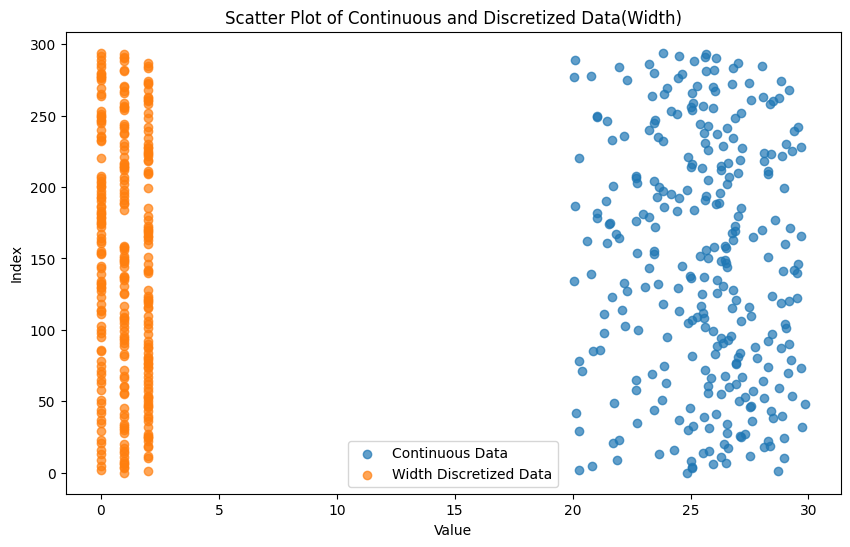

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(Temp_before, np.arange(len(Temp_before)), alpha=0.7, label='Continuous Data')
plt.scatter(Temp_after_width, np.arange(len(Temp_after_width)), alpha=0.7, label='Width Discretized Data')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Index')
plt.title('Scatter Plot of Continuous and Discretized Data(Width)')
plt.show()

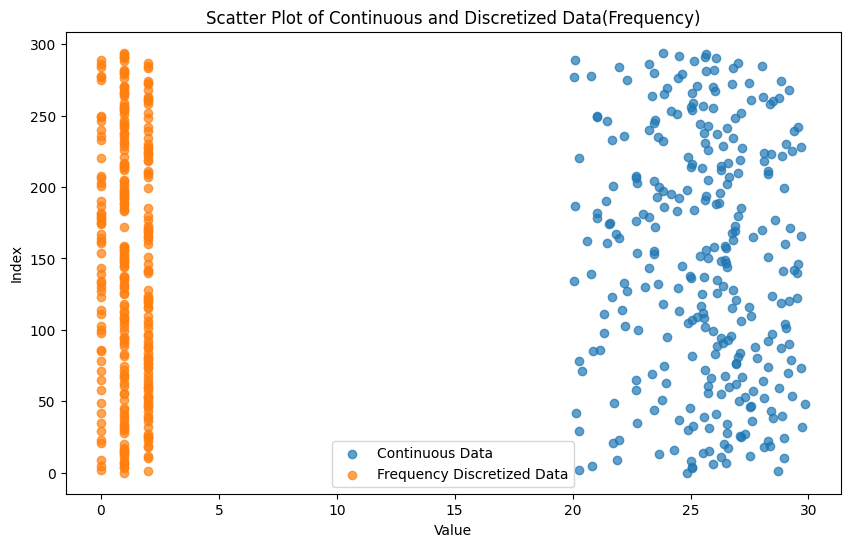

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(Temp_before, np.arange(len(Temp_before)), alpha=0.7, label='Continuous Data')
plt.scatter(Temp_after_freq, np.arange(len(Temp_after_freq)), alpha=0.7, label='Frequency Discretized Data')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Index')
plt.title('Scatter Plot of Continuous and Discretized Data(Frequency)')
plt.show()

In [94]:
#discretization des autres attributs(pour faciliter l extraction des motifs frequents)
intervales=discretisation_width(dataset3,'Humidity',4)

In [95]:
print(intervales)
dataset3

[(0, (80.12, 85.085)), (1, (85.085, 90.05)), (2, (90.05, 95.015)), (3, (95.015, 99.98))]


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,1.0,0.0,295.61,Clayey,rice,DAP
1,2.0,3.0,178.96,laterite,Coconut,Good NPK
2,0.0,0.0,270.44,silty clay,rice,MOP
3,1.0,3.0,192.90,sandy,Coconut,Urea
4,1.0,3.0,174.80,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,1.0,3.0,143.53,sandy,Coconut,MOP
291,1.0,0.0,209.90,silty clay,rice,MOP
292,1.0,0.0,230.45,Clayey,rice,MOP
293,1.0,0.0,217.38,Clayey,rice,MOP


In [96]:
Intervales=discretisation_width(dataset3,'Rainfall',4)

In [97]:
print(Intervales)
dataset3

[(0, (131.09, 172.9575)), (1, (172.9575, 214.825)), (2, (214.825, 256.6925)), (3, (256.6925, 298.56))]


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,1.0,0.0,3.0,Clayey,rice,DAP
1,2.0,3.0,1.0,laterite,Coconut,Good NPK
2,0.0,0.0,3.0,silty clay,rice,MOP
3,1.0,3.0,1.0,sandy,Coconut,Urea
4,1.0,3.0,1.0,coastal,Coconut,Urea
...,...,...,...,...,...,...
290,1.0,3.0,0.0,sandy,Coconut,MOP
291,1.0,0.0,1.0,silty clay,rice,MOP
292,1.0,0.0,2.0,Clayey,rice,MOP
293,1.0,0.0,2.0,Clayey,rice,MOP


Frequent Patterns

Definition des transactions et des items

In [98]:
dataset3['ItemsColumn']=dataset3.apply(lambda row: (row['Temperature'],row['Humidity'],row['Rainfall'],row['Crop'],row['Fertilizer']), axis=1)
dataset3

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,ItemsColumn
0,1.0,0.0,3.0,Clayey,rice,DAP,"(1.0, 0.0, 3.0, rice, DAP)"
1,2.0,3.0,1.0,laterite,Coconut,Good NPK,"(2.0, 3.0, 1.0, Coconut, Good NPK)"
2,0.0,0.0,3.0,silty clay,rice,MOP,"(0.0, 0.0, 3.0, rice, MOP)"
3,1.0,3.0,1.0,sandy,Coconut,Urea,"(1.0, 3.0, 1.0, Coconut, Urea)"
4,1.0,3.0,1.0,coastal,Coconut,Urea,"(1.0, 3.0, 1.0, Coconut, Urea)"
...,...,...,...,...,...,...,...
290,1.0,3.0,0.0,sandy,Coconut,MOP,"(1.0, 3.0, 0.0, Coconut, MOP)"
291,1.0,0.0,1.0,silty clay,rice,MOP,"(1.0, 0.0, 1.0, rice, MOP)"
292,1.0,0.0,2.0,Clayey,rice,MOP,"(1.0, 0.0, 2.0, rice, MOP)"
293,1.0,0.0,2.0,Clayey,rice,MOP,"(1.0, 0.0, 2.0, rice, MOP)"


In [100]:
dataitems=pd.DataFrame(dataset3.groupby('Soil')['ItemsColumn'],columns=['Transaction','Items'])
dataitems

,Transaction,Items
0,Clayey,"0 (1.0, 0.0, 3.0, rice, DAP) 7 ..."
1,alluvial,"6 (1.0, 2.0, 0.0, Coconut, Urea) 10 ..."
2,clay loam,"5 (0.0, 0.0, 2.0, rice, Urea) 13 ..."
3,coastal,"4 (1.0, 3.0, 1.0, Coconut, Urea) 8 ..."
4,laterite,"1 (2.0, 3.0, 1.0, Coconut, Good NPK) 11 ..."
5,sandy,"3 (1.0, 3.0, 1.0, Coconut, Urea) 12 ..."
6,silty clay,"2 (0.0, 0.0, 3.0, rice, MOP) 9 (0.0..."


In [101]:
dataitems['Items']=dataitems['Items'].apply(list)
dataitems

,Transaction,Items
0,Clayey,"[(1.0, 0.0, 3.0, rice, DAP), (1.0, 0.0, 2.0, r..."
1,alluvial,"[(1.0, 2.0, 0.0, Coconut, Urea), (2.0, 3.0, 2...."
2,clay loam,"[(0.0, 0.0, 2.0, rice, Urea), (1.0, 0.0, 2.0, ..."
3,coastal,"[(1.0, 3.0, 1.0, Coconut, Urea), (1.0, 3.0, 0...."
4,laterite,"[(2.0, 3.0, 1.0, Coconut, Good NPK), (1.0, 3.0..."
5,sandy,"[(1.0, 3.0, 1.0, Coconut, Urea), (2.0, 2.0, 0...."
6,silty clay,"[(0.0, 0.0, 3.0, rice, MOP), (0.0, 0.0, 2.0, r..."


Generation des candidats

In [50]:
from itertools import combinations

def generate_CK(k,L):
    if k==1:
        CK = L
        return CK
    
    items=[item for item, support in L]

    if k==2:
        CK = list(set(combinations(items, 2)))
        return CK
    
    CK=[]
    for i in range(len(items)-1):
        for j in range(i+1,len(items)):
            item=list(set(items[i]) | set(items[j]))
            combins = list(set(combinations(item,k-1)))
            c=True
            if item not in CK:
                for comb in combins:
                    if comb not in items:
                        c=False
                        break
                if c:
                    CK.append(item)
    return CK
            
    

Calcul du support

In [51]:
def calculate_support(Ck, k):
    supports = [0] * len(Ck)
    
    if k == 1:
        for i, item in enumerate(Ck):
            for index, row in dataitems.iterrows():
                if item in row['Items']:
                    supports[i] += 1
    else:
        for i, item in enumerate(Ck):
            for index, row in dataitems.iterrows():
                if all(i in row['Items'] for i in item):
                    supports[i] += 1
    
    
    # Create a dictionary where keys are itemsets and values are the support counts
    support_dict = {tuple(itemset): support for itemset, support in zip(Ck, supports)}
    
    return support_dict


Generation des Lk

In [52]:
def generate_Lk(Ck,k, supp_min):
    Lk = []
    support = calculate_support(Ck,k)
    for item, support in support.items():
        if support >= supp_min:
            Lk.append((item,support))
    return Lk

Algorithme

In [53]:
def apriori(df,supp_min):
    #supp_min=support*dataitems.shape[0]
    Lk=df['ItemsColumn'].unique().tolist()

    k=1
    #supp_min=3
    Ck=[]
    frequent_pattern=[]
    
    while(Lk):
        Ck=generate_CK(k,Lk)
        Lk=generate_Lk(Ck,k,supp_min)
        frequent_pattern+=[item for item in Lk]
        k+=1
    return frequent_pattern


In [102]:
nb_FP=[]
for i in range(2,8):
    FP=apriori(dataset3,i)
    nb_FP.append((i,len(FP)))

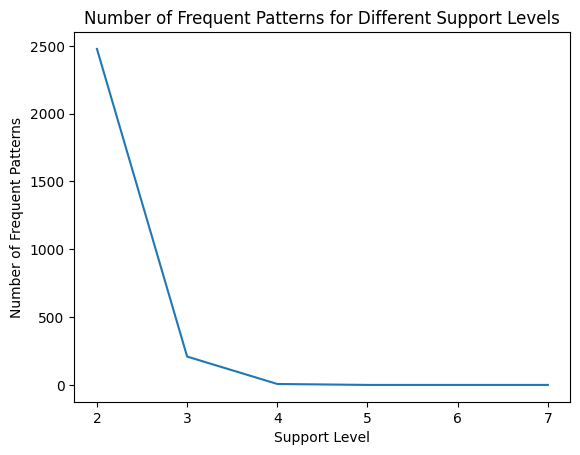

In [103]:
import matplotlib.pyplot as plt

# Extract the support levels and number of frequent patterns
support_levels = [x[0] for x in nb_FP]
num_patterns = [x[1] for x in nb_FP]

# Create a line chart
plt.plot(support_levels, num_patterns)

# Add labels and title
plt.xlabel("Support Level")
plt.ylabel("Number of Frequent Patterns")
plt.title("Number of Frequent Patterns for Different Support Levels")

# Show the plot
plt.show()

In [104]:
FP=apriori(dataset3,3) #prennant un exemple pour support=3
for item in FP:
    print(item)


((0.0, 0.0, 2.0, 'rice', 'Urea'), 3)
((1.0, 2.0, 0.0, 'Coconut', 'Urea'), 4)
((1.0, 0.0, 2.0, 'rice', 'DAP'), 3)
((2.0, 2.0, 0.0, 'Coconut', 'Good NPK'), 3)
((1.0, 0.0, 2.0, 'rice', 'Urea'), 3)
((2.0, 2.0, 0.0, 'Coconut', 'Urea'), 3)
((1.0, 0.0, 2.0, 'rice', 'MOP'), 3)
((0.0, 0.0, 3.0, 'rice', 'DAP'), 3)
((2.0, 3.0, 1.0, 'Coconut', 'Urea'), 3)
((2.0, 3.0, 1.0, 'Coconut', 'DAP'), 3)
((2.0, 3.0, 0.0, 'Coconut', 'Urea'), 4)
((2.0, 3.0, 1.0, 'Coconut', 'MOP'), 3)
((1.0, 0.0, 1.0, 'rice', 'DAP'), 3)
((1.0, 3.0, 1.0, 'Coconut', 'DAP'), 3)
((1.0, 0.0, 1.0, 'rice', 'Good NPK'), 3)
((1.0, 0.0, 3.0, 'rice', 'Urea'), 3)
((1.0, 0.0, 1.0, 'rice', 'MOP'), 3)
((1.0, 0.0, 1.0, 'Coconut', 'Urea'), 3)
((2.0, 3.0, 0.0, 'Coconut', 'DAP'), 4)
((1.0, 2.0, 0.0, 'Coconut', 'MOP'), 3)
((2.0, 2.0, 0.0, 'Coconut', 'MOP'), 3)
((2.0, 3.0, 2.0, 'Coconut', 'MOP'), 3)
((2.0, 3.0, 0.0, 'Coconut', 'MOP'), 3)
((1.0, 0.0, 1.0, 'Coconut', 'MOP'), 3)
(((2.0, 2.0, 0.0, 'Coconut', 'Good NPK'), (1.0, 3.0, 1.0, 'Coconut', 'DAP

Association Rules

Calcul de la confiance

In [105]:
def confiance(item1,item2,data):
    
    P_A_B = 0
    P_A = 0
    for index, row in data.iterrows():
        if all(i in row['Items'] for i in item1) and all(i in row['Items'] for i in item2):
            P_A_B += 1
        if all(i in row['Items'] for i in item1):
            P_A += 1

    return round((P_A_B / P_A),2) if P_A != 0 else 0
  

Extraction des regles d'association

In [106]:
from itertools import permutations
def generate_association_rules(FP,conf_min):
    
    frequent_2=[]
    for itemset,support in FP:
        if len(itemset) >= 2 and isinstance(itemset[0],tuple):
            frequent_2.append((itemset,support))
    #print(frequent_2)

    association_rules = []

    for itemset,support in frequent_2:
        for r in range(1, len(itemset)):
            for antecedent in combinations(itemset, r):
                consequent = tuple(set(itemset) - set(antecedent))
                conf=confiance(antecedent,consequent,dataitems)
                if(conf>=conf_min):
                    association_rules.append((set(antecedent), set(consequent),support,conf))

    return association_rules


In [107]:
i=0.1
nb_rules=[]
while(i<1):
    association_rules=generate_association_rules(FP,i)
    nb_rules.append((i,len(association_rules)))
    i+=0.1

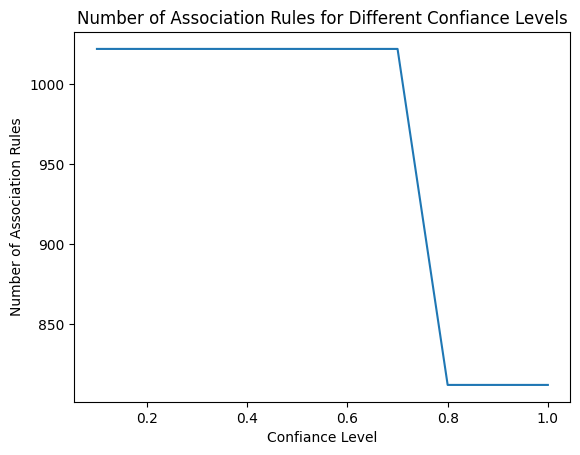

In [108]:

# Extract the support levels and number of frequent patterns
confiance_levels = [x[0] for x in nb_rules]
num_rules = [x[1] for x in nb_rules]

# Create a line chart
plt.plot(confiance_levels, num_rules)

# Add labels and title
plt.xlabel("Confiance Level")
plt.ylabel("Number of Association Rules")
plt.title("Number of Association Rules for Different Confiance Levels")

# Show the plot
plt.show()

In [109]:
def afficher_association_rules(association_rules):
    for rule in association_rules:
        item1,item2,support,confiance=rule
        print(f"{item1} -> {item2} ({support},{confiance})")

In [110]:
def afficher_rules(rules):
    for rule,mesure in rules:
        item1,item2,support,confiance=rule
        print(f"{item1} -> {item2} ({support},{confiance},{mesure})")

In [111]:
association_rules=generate_association_rules(FP,0.7) #prennant un exemple pour confiance=0.7
afficher_association_rules(association_rules)


{(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} (3,1.0)
{(2.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0)
{(1.0, 0.0, 2.0, 'rice', 'Urea')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0)
{(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} -> {(2.0, 3.0, 0.0, 'Coconut', 'Urea')} (3,1.0)
{(2.0, 3.0, 0.0, 'Coconut', 'Urea')} -> {(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} (3,0.75)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(1.0, 0.0, 1.0, 'rice', 'DAP')} (3,1.0)
{(1.0, 0.0, 1.0, 'rice', 'DAP')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0)
{(2.0, 3.0,

Extraction des fortes regles d'association

Calcul Confidence

In [112]:
sorted(association_rules, key=lambda x: x[3], reverse=True)
forte_rules=[rule for rule in association_rules if rule[3]==max(association_rules, key=lambda x: x[3])[3]]
afficher_association_rules(forte_rules)

{(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} (3,1.0)
{(2.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0)
{(1.0, 0.0, 2.0, 'rice', 'Urea')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0)
{(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} -> {(2.0, 3.0, 0.0, 'Coconut', 'Urea')} (3,1.0)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(1.0, 0.0, 1.0, 'rice', 'DAP')} (3,1.0)
{(1.0, 0.0, 1.0, 'rice', 'DAP')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0)
{(2.0, 3.0, 1.0, 'Coconut', 'Urea')} -> {(2.0, 3.0, 0.0, 'Coconut', 'MOP')} (3,1.0)
{(2.0, 3.0, 0.0, 

Calcul Lift

In [113]:
forte_rules=[]
for i in range(len(association_rules)):
    rule=association_rules[i]
    item1,item2,support,confiance=rule
    P_A = 0
    for index, row in dataitems.iterrows():
        if all(val in row['Items'] for val in item2):
            P_A += 1
    lift=round(confiance / P_A, 2)
    #lift=lift(rule)
    forte_rules.append((rule,lift))
    
sorted(forte_rules, key=lambda x: x[1], reverse=True) # Sort forte_rules
max_lift=max(forte_rules, key=lambda x: x[1])[1]
forte_rules=[(rule,lift) for rule,lift in forte_rules if lift==max_lift]


In [114]:
afficher_rules(forte_rules)

{(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,0.33)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} (3,1.0,0.33)
{(2.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,0.33)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,0.33)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,0.33)
{(1.0, 0.0, 2.0, 'rice', 'Urea')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,0.33)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0,0.33)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,0.33)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(1.0, 0.0, 1.0, 'rice', 'DAP')} (3,1.0,0.33)
{(1.0, 0.0, 1.0, 'rice', 'DAP')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0,0.33)
{(2.0, 3.0, 1.0, 'Coconut', 'Urea')} -> {(2.0, 3.0, 0.0, 'Coconut', 'MOP')} (3,1.0,0.33)
{(2.0, 3.0, 0.0, 'Coconut', 'MOP')} -> {(2.0, 3.0, 

Calcul Cosine

In [115]:
import math
forte_rules=[]
for i in range(len(association_rules)):
    item1,item2,support,confiance=rule
    rule=association_rules[i]
    item1,item2,support,confiance=rule
    P_A_B = 0
    P_A = 0
    P_B = 0
    for index, row in dataitems.iterrows():
        if all(i in row['Items'] for i in item1) and all(i in row['Items'] for i in item2):
            P_A_B += 1
        if all(i in row['Items'] for i in item1):
            P_A += 1
        if all(i in row['Items'] for i in item2):
            P_B += 1

    cosine=round((P_A_B / math.sqrt(P_A*P_B)),2) if P_A != 0 else 0
    forte_rules.append((rule,cosine))

sorted(forte_rules, key=lambda x: x[1], reverse=True) # Sort forte_rules
max_cosine=max(forte_rules, key=lambda x: x[1])[1]
forte_rules=[(rule,cosine) for rule,cosine in forte_rules if cosine==max_cosine]
    


In [116]:
afficher_rules(forte_rules)

{(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} (3,1.0,1.0)
{(2.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,1.0)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,1.0)
{(1.0, 0.0, 2.0, 'rice', 'Urea')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,1.0)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(1.0, 0.0, 1.0, 'rice', 'DAP')} (3,1.0,1.0)
{(1.0, 0.0, 1.0, 'rice', 'DAP')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0,1.0)
{(2.0, 3.0, 1.0, 'Coconut', 'Urea')} -> {(2.0, 3.0, 0.0, 'Coconut', 'MOP')} (3,1.0,1.0)
{(2.0, 3.0, 0.0, 'Coconut', 'MOP')} -> {(2.0, 3.0, 1.0, 'Cocon

Calcul Jaccard

In [117]:
forte_rules=[]
for i in range(len(association_rules)):
    item1,item2,support,confiance=rule
    rule=association_rules[i]
    item1,item2,support,confiance=rule
    P_A_B = 0
    P_A = 0
    P_B = 0
    for index, row in dataitems.iterrows():
        if all(i in row['Items'] for i in item1) and all(i in row['Items'] for i in item2):
            P_A_B += 1
        if all(i in row['Items'] for i in item1):
            P_A += 1
        if all(i in row['Items'] for i in item2):
            P_B += 1
    jaccard=round((P_A_B / (P_A + P_B - P_A_B)),2)
    forte_rules.append((rule,jaccard))

sorted(forte_rules, key=lambda x: x[1], reverse=True) # Sort forte_rules
max_jaccard=max(forte_rules, key=lambda x: x[1])[1]
forte_rules=[(rule,jaccard) for rule,jaccard in forte_rules if jaccard==max_jaccard]

In [118]:
afficher_rules(forte_rules)

{(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} (3,1.0,1.0)
{(2.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,1.0)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,1.0)
{(1.0, 0.0, 2.0, 'rice', 'Urea')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,1.0)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(1.0, 0.0, 1.0, 'rice', 'DAP')} (3,1.0,1.0)
{(1.0, 0.0, 1.0, 'rice', 'DAP')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0,1.0)
{(2.0, 3.0, 1.0, 'Coconut', 'Urea')} -> {(2.0, 3.0, 0.0, 'Coconut', 'MOP')} (3,1.0,1.0)
{(2.0, 3.0, 0.0, 'Coconut', 'MOP')} -> {(2.0, 3.0, 1.0, 'Cocon

Calcul Kulczynski

In [119]:
forte_rules=[]
for i in range(len(association_rules)):
    item1,item2,support,confiance=rule
    rule=association_rules[i]
    item1,item2,support,confiance=rule
    P_A_B = 0
    P_A = 0
    P_B = 0
    for index, row in dataitems.iterrows():
        if all(i in row['Items'] for i in item1) and all(i in row['Items'] for i in item2):
            P_A_B += 1
        if all(i in row['Items'] for i in item1):
            P_A += 1
        if all(i in row['Items'] for i in item2):
            P_B += 1
    kulczynski= round(((1/2)*((P_A_B/P_A)+(P_A_B/P_B))),2)
    forte_rules.append((rule,kulczynski))

sorted(forte_rules, key=lambda x: x[1], reverse=True) # Sort forte_rules
max_kulczynski=max(forte_rules, key=lambda x: x[1])[1]
forte_rules=[(rule,kulczynski) for rule,kulczynski in forte_rules if kulczynski==max_kulczynski]

In [120]:
afficher_rules(forte_rules)

{(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 2.0, 0.0, 'Coconut', 'Good NPK')} (3,1.0,1.0)
{(2.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(1.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,1.0)
{(1.0, 3.0, 1.0, 'Coconut', 'DAP')} -> {(2.0, 3.0, 1.0, 'Coconut', 'DAP')} (3,1.0,1.0)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,1.0)
{(1.0, 0.0, 2.0, 'rice', 'Urea')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,1.0)
{(0.0, 0.0, 2.0, 'rice', 'Urea')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(0.0, 0.0, 2.0, 'rice', 'Urea')} (3,1.0,1.0)
{(1.0, 0.0, 2.0, 'rice', 'MOP')} -> {(1.0, 0.0, 1.0, 'rice', 'DAP')} (3,1.0,1.0)
{(1.0, 0.0, 1.0, 'rice', 'DAP')} -> {(1.0, 0.0, 2.0, 'rice', 'MOP')} (3,1.0,1.0)
{(2.0, 3.0, 1.0, 'Coconut', 'Urea')} -> {(2.0, 3.0, 0.0, 'Coconut', 'MOP')} (3,1.0,1.0)
{(2.0, 3.0, 0.0, 'Coconut', 'MOP')} -> {(2.0, 3.0, 1.0, 'Cocon

Insertion d'observations et recommandation

In [145]:
import random
def recommandation_soil(observation,data):
    recommandations=[]
    for index, row in data.iterrows():
        if observation in row['Items']:
            recommandations.append(row['Transaction'])
    return random.choice(list(set(recommandations)))

In [149]:
import random
def recommandation_item(observation,data,RA):
    recommandations=[]
    for rule in RA:
        item1,item2,support,confiance=rule
        if observation in item1 and len(item2)==1 :
            recommandations.append((item2,support,confiance))
    recommandations=[item for item in recommandations if item[1]==max(recommandations, key=lambda x: x[1])[1]]
    recommandations=[item[0] for item in recommandations if item[2]==max(recommandations, key=lambda x: x[2])[2]]
    
    return random.choice(recommandations)
    
    

In [147]:
recomm=recommandation_soil((2.0, 3.0, 2.0, 'Coconut', 'DAP'),dataitems)
recomm

'alluvial'

In [150]:
rec=recommandation_item((2.0,3.0,1.0,'Coconut','DAP'),dataitems,association_rules)
rec

{(1.0, 3.0, 1.0, 'Coconut', 'DAP')}